![](../assets/ITDP_PrestigeLogo.png)

## Analysis of pollution levels
etc.

- __Source:__ [Meteorología,](http://www.aire.cdmx.gob.mx/default.php?opc='aKBhnmI='&opcion=Zw==)
[Contamianción](http://www.aire.cdmx.gob.mx/default.php?opc='aKBhnmI='&opcion=Zg==)
- __Responsable:__ Daniel Bustillos
- __Contact:__  juandaniel.bucam@gmail.com
___

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn
import datetime

Read processed pollution an weather data from 2015 to 2020 (may):

In [2]:
df_15 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2015.csv")
df_15 = df_15[df_15['mes']<5]

df_16 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2016.csv")
df_16 = df_16[df_16['mes']<5]

df_17 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2017.csv")
df_17 = df_17[df_17['mes']<5]

df_18 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2018.csv")
df_18 = df_18[df_18['mes']<5]

df_19 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2019.csv")
df_19 = df_19[df_19['mes']<5]

df_20 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2020.csv")
df_20 = df_20[df_20['mes']<5]


Put the 5 tables together in one

In [3]:
df_append = pd.DataFrame(columns=df_19.columns.tolist())#change to 2019
df_append = df_append.append(df_15, ignore_index=True,sort=True)
df_append = df_append.append(df_16, ignore_index=True,sort=True)
df_append = df_append.append(df_17, ignore_index=True,sort=True)
df_append = df_append.append(df_18, ignore_index=True,sort=True)
df_append = df_append.append(df_19, ignore_index=True,sort=True)
df_append = df_append.append(df_20, ignore_index=True,sort=True)
del df_15, df_16, df_17, df_18, df_19, df_20

Fix dates

In [4]:
df_append['año'] = df_append['fecha'].str[:4]

df_append['fecha'] = pd.to_datetime(df_append['fecha'], format='%Y-%m-%d %H:%M:%S')

df_append['fecha'] = pd.to_datetime(df_append['fecha']) - pd.to_timedelta(7, unit='d')

Get week nunmber

In [5]:
week_list = []
for row in range(len(df_append)):
    year = df_append.loc[row, "año"]
    month = df_append.loc[row, "mes"]
    day = df_append.loc[row, "dia"]
    week =  datetime.date(int(year), int(month), int(day)).isocalendar()[1]
    week_list.append(week)

df_append['week'] = week_list

df_append['año'] = df_append['año'].astype(int)
df_append['mes'] = df_append['mes'].astype(int)

**Table example**

In [6]:
df_append.head(8)

,CO,NO,NO2,NOX,O3,PBa,PM10,PM2.5,PMCO,RH,...,TMP,WDR,WSP,dia,fecha,hora,id_station,mes,año,week
0,0.6,14.0,21.0,35.0,4.0,NaN,84.0,NaN,NaN,82.0,...,9.0,358.0,1.8,1,2014-12-25 01:00:00,1,ACO,1,2015,1
1,1.2,3.0,58.0,61.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,180.0,1.3,1,2014-12-25 01:00:00,1,AJM,1,2015,1
2,NaN,NaN,NaN,NaN,3.0,NaN,86.0,NaN,NaN,78.0,...,10.1,150.0,0.7,1,2014-12-25 01:00:00,1,CHO,1,2015,1
3,1.7,11.0,51.0,62.0,14.0,NaN,NaN,NaN,NaN,75.0,...,10.1,204.0,1.4,1,2014-12-25 01:00:00,1,CUA,1,2015,1
4,NaN,74.0,22.0,96.0,3.0,NaN,186.0,NaN,NaN,95.0,...,6.1,238.0,0.3,1,2014-12-25 01:00:00,1,CUT,1,2015,1
5,1.7,17.0,49.0,66.0,5.0,NaN,153.0,NaN,NaN,83.0,...,10.9,NaN,NaN,1,2014-12-25 01:00:00,1,FAC,1,2015,1
6,1.6,37.0,49.0,86.0,3.0,586.0,123.0,84.0,38.0,70.0,...,11.9,317.0,1.3,1,2014-12-25 01:00:00,1,MER,1,2015,1
7,2.0,44.0,60.0,104.0,3.0,NaN,165.0,146.0,19.0,NaN,...,NaN,240.0,0.4,1,2014-12-25 01:00:00,1,MGH,1,2015,1


In [7]:
df_append.loc[(df_append['año'] != 2020),
                  'año'] = '2015-2019'

Obtain mean by day

In [8]:
df_day = df_append.groupby(['mes','año'])[["PM10", 'PM2.5', "O3", 'NO2']].mean().reset_index(drop=False)

In [9]:
df_day

,mes,año,PM10,PM2.5,O3,NO2
0,1,2020,44.616415,19.663106,23.375224,24.738990
1,1,2015-2019,56.823135,27.437235,26.666890,30.311709
2,2,2020,45.904133,19.292316,27.763075,23.383495
3,2,2015-2019,56.039905,25.776931,30.738632,27.788547
4,3,2020,49.935140,22.495982,34.982064,21.740601
5,3,2015-2019,46.576455,22.557887,31.991938,24.289740
6,4,2020,44.262771,24.478468,43.951713,15.854131
7,4,2015-2019,52.948741,27.750405,39.899393,24.602173


___

## Analysis

### Pollutant Distribution

In [10]:
df_day

,mes,año,PM10,PM2.5,O3,NO2
0,1,2020,44.616415,19.663106,23.375224,24.738990
1,1,2015-2019,56.823135,27.437235,26.666890,30.311709
2,2,2020,45.904133,19.292316,27.763075,23.383495
3,2,2015-2019,56.039905,25.776931,30.738632,27.788547
4,3,2020,49.935140,22.495982,34.982064,21.740601
5,3,2015-2019,46.576455,22.557887,31.991938,24.289740
6,4,2020,44.262771,24.478468,43.951713,15.854131
7,4,2015-2019,52.948741,27.750405,39.899393,24.602173


Text(0, 0.5, 'Week number')

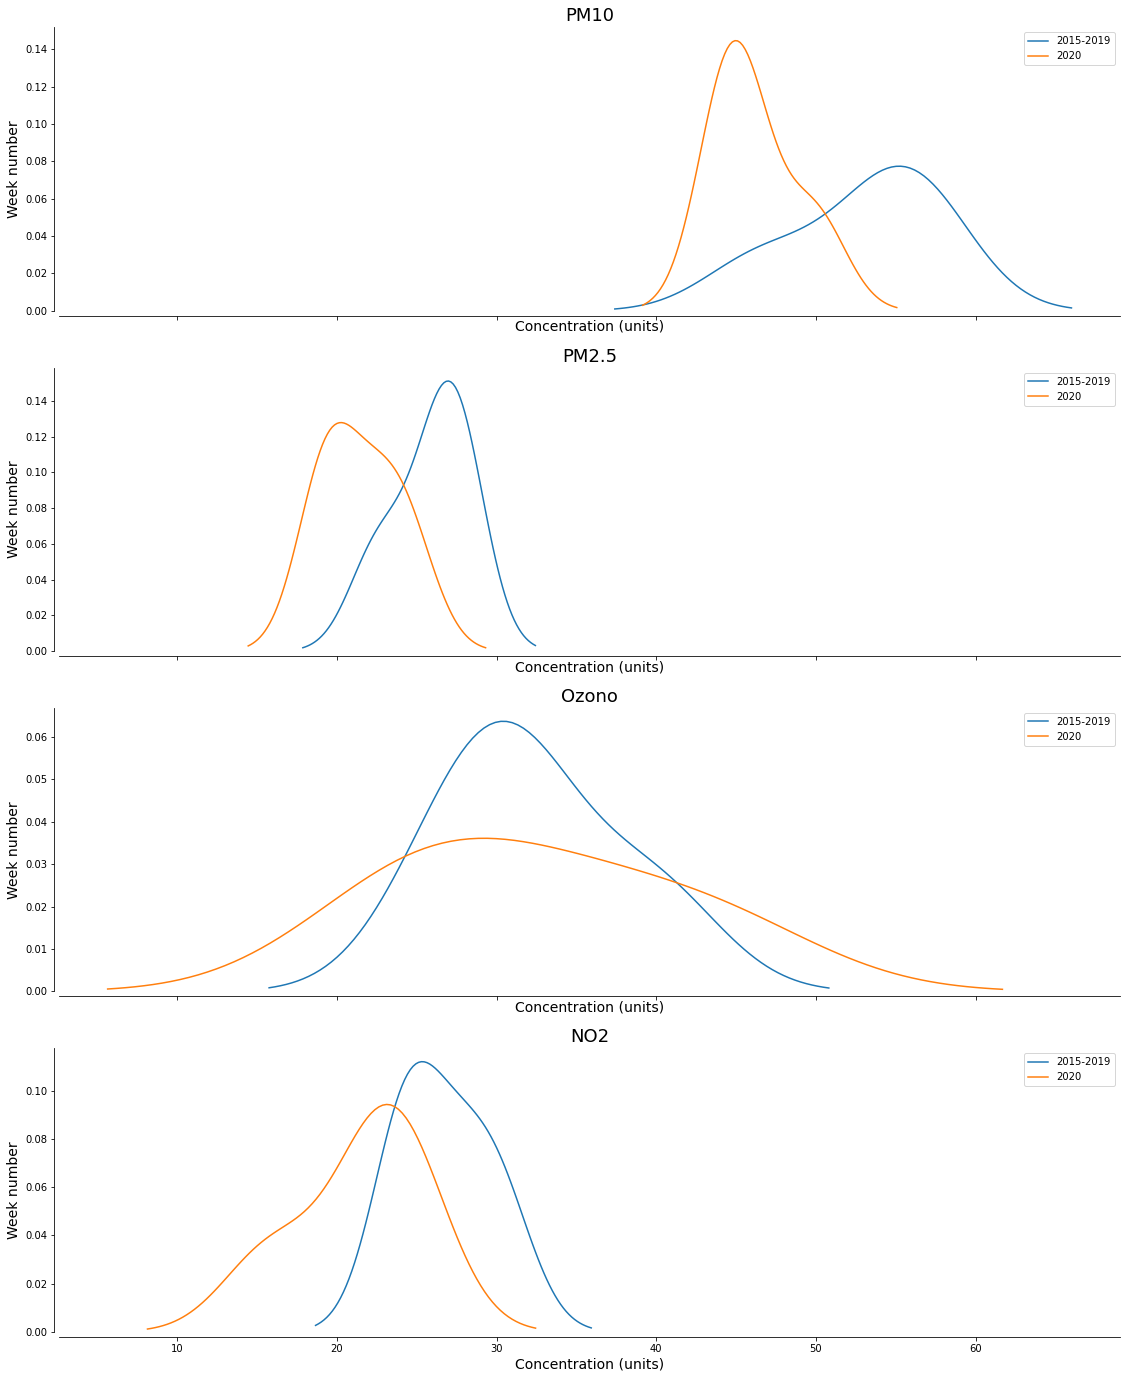

In [11]:
f, axes = plt.subplots(4 ,figsize=(19, 24), sharex=True)
anios = ["2015-2019",2020]


[sns.distplot(df_day[df_day["año"]==anio]['PM10'], label=str(anio), ax=axes[0], hist=False, norm_hist=False, kde=True) for anio in anios]
sns.despine()
sns.despine(offset=5, trim=False)
axes[0].set_title("PM10", fontsize=18)
axes[0].set_xlabel('Concentration (units)', fontsize=14)
axes[0].set_ylabel('Week number', fontsize=14)
######

[sns.distplot(df_day[df_day["año"]==anio]['PM2.5'], label=str(anio), ax=axes[1], hist=False, norm_hist=False, kde=True) for anio in anios]
sns.despine()
sns.despine(offset=5, trim=False)
axes[1].set_title("PM2.5", fontsize=18)
axes[1].set_xlabel('Concentration (units)', fontsize=14)
axes[1].set_ylabel('Week number', fontsize=14)
######

[sns.distplot(df_day[df_day["año"]==anio]['O3'], label=str(anio), ax=axes[2], hist=False, norm_hist=False, kde=True) for anio in anios]
sns.despine()
sns.despine(offset=5, trim=False)
axes[2].set_title("Ozono", fontsize=18)
axes[2].set_xlabel('Concentration (units)', fontsize=14)
axes[2].set_ylabel('Week number', fontsize=14)
######


[sns.distplot(df_day[df_day["año"]==anio]['NO2'], label=str(anio), ax=axes[3], hist=False, norm_hist=False, kde=True) for anio in anios]
sns.despine()
sns.despine(offset=5, trim=False)
axes[3].set_title("NO2", fontsize=18)
axes[3].set_xlabel('Concentration (units)', fontsize=14)
axes[3].set_ylabel('Week number', fontsize=14)
######

___
### Pollution by week

In [12]:
week_list = []
for row in range(len(df_append)):
    year = df_append.loc[row, "año"]
    month = df_append.loc[row, "mes"]
    day = df_append.loc[row, "dia"]
    week =  datetime.date(int(year), int(month), int(day)).isocalendar()[1]
    week_list.append(week)

df_append['week'] = week_list

df_append['año'] = df_append['año'].astype(int)
df_append['mes'] = df_append['mes'].astype(int)

ValueError: invalid literal for int() with base 10: '2015-2019'

In [621]:
def q1(x):
    return x.quantile(0.1)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.9)

df_pm10 = df_append.groupby(['week', 'año'])[["PM10"]].agg([q1,'mean', q3]).reset_index(drop=False)
df_pm10.columns = ['week', 'año', 'PM10_p1', 'PM10_mean', 'PM10_p9']

df_pm25 = df_append.groupby(['week', 'año'])[["PM2.5"]].agg([q1,'mean', q3]).reset_index(drop=False)
df_pm25.columns = ['week', 'año', 'PM25_p1', 'PM25_mean', 'PM25_p9']

df_O3 = df_append.groupby(['week', 'año'])[["O3"]].agg([q1,'mean', q3]).reset_index(drop=False)
df_O3.columns = ['week', 'año', 'O3_p1', 'O3_mean', 'O3_p9']

df_NO2 = df_append.groupby(['week', 'año'])[["NO2"]].agg([q1,'mean', q3]).reset_index(drop=False)
df_NO2.columns = ['week', 'año', 'NO2_p1', 'NO2_mean', 'NO2_p9']

filtrar first 18 weeks of every year

In [622]:
df_pm10 = df_pm10[df_pm10['week']<= 18]
df_pm25 = df_pm25[df_pm25['week']<= 18]
df_O3 = df_O3[df_O3['week']<= 18]
df_NO2 = df_NO2[df_NO2['week']<= 18]

**config**

In [623]:
sns.set_style("whitegrid")
a4_dims = (11.7, 8.27)
sns.set(rc={"lines.linewidth": 2})
sns.set_style("whitegrid")

years_to_plot = [2018,2019,2020]

In [635]:
def plot(contaminante, df):
    
    # plot
    f, axes = plt.subplots(3 ,figsize=(12, 25), sharex=True)

    
    contaminante_mean = contaminante + "_mean"
    contaminante_p1 = contaminante + "_p1"
    contaminante_p9 = contaminante + "_p9"
    
    

    sns.lineplot(x="week", y=contaminante_mean, hue='año', data=df[df['año'].isin(years_to_plot)],
                 ax=axes[0], palette=sns.color_palette("deep",len(years_to_plot)))
    sns.despine()
    sns.despine(offset=5, trim=False)
    axes[0].set_title(contaminante + ' mean by week', fontsize=18)
    axes[0].set_ylabel('Concentration (units)', fontsize=14)
    axes[0].set_xlabel('Week number', fontsize=14)
    ######
    sns.lineplot(x="week", y=contaminante_p1, hue='año', data=df[df['año'].isin(years_to_plot)],
                 ax=axes[1], palette=sns.color_palette("deep",len(years_to_plot)))
    sns.despine()
    sns.despine(offset=5, trim=False)
    axes[1].set_title(contaminante + ' (Percentile 10) by week', fontsize=18)
    axes[1].set_ylabel('Concentration (units)', fontsize=14)
    axes[1].set_xlabel('Week number', fontsize=14)
    #####

    sns.lineplot(x="week", y=contaminante_p9, hue='año', data=df[df['año'].isin(years_to_plot)],
                 ax=axes[2], palette=sns.color_palette("deep",len(years_to_plot)))
    sns.despine()
    sns.despine(offset=5, trim=False)
    axes[2].set_title(contaminante + ' (Percentile 90) by week', fontsize=18)
    axes[2].set_ylabel('Concentration (units)', fontsize=14)
    axes[2].set_xlabel('Week number', fontsize=14)
    #####


    sns.despine(left=True)
    
    
    if contaminante == 'PM25':
        contaminante = 'PM2.5'
        

    a = pd.pivot_table(df_append, values=contaminante, columns='año', index='week', aggfunc='mean').reset_index(drop=True)
    f, ax = plt.subplots(figsize=(9, 12))
    sns.heatmap(a, annot=True, linewidths=.5, ax=ax)
    ax.set_title(contaminante + ' Mean by Week', fontsize=14)
    ax.set_ylabel('Week', fontsize=10)
    ax.set_xlabel('year', fontsize=10)

## PM10

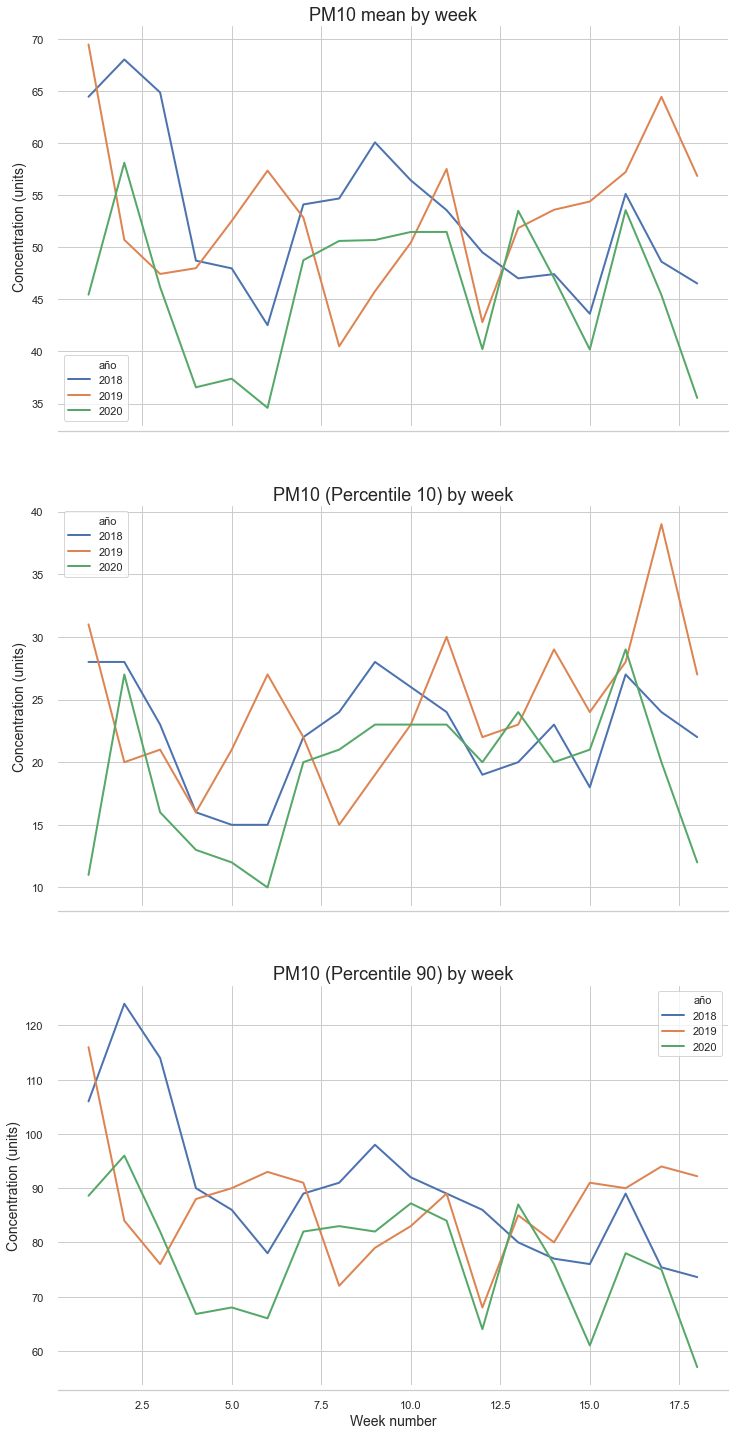

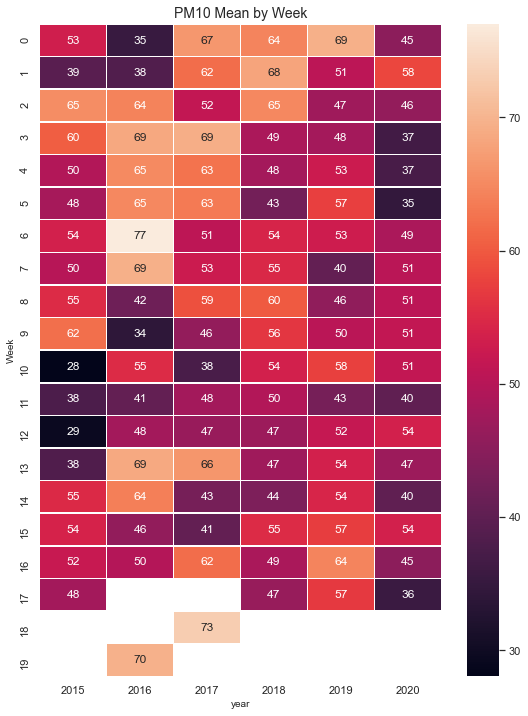

In [636]:
df = df_pm10
contaminante = 'PM10'
plot(contaminante='PM10', df=df_pm10)

## PM2.5

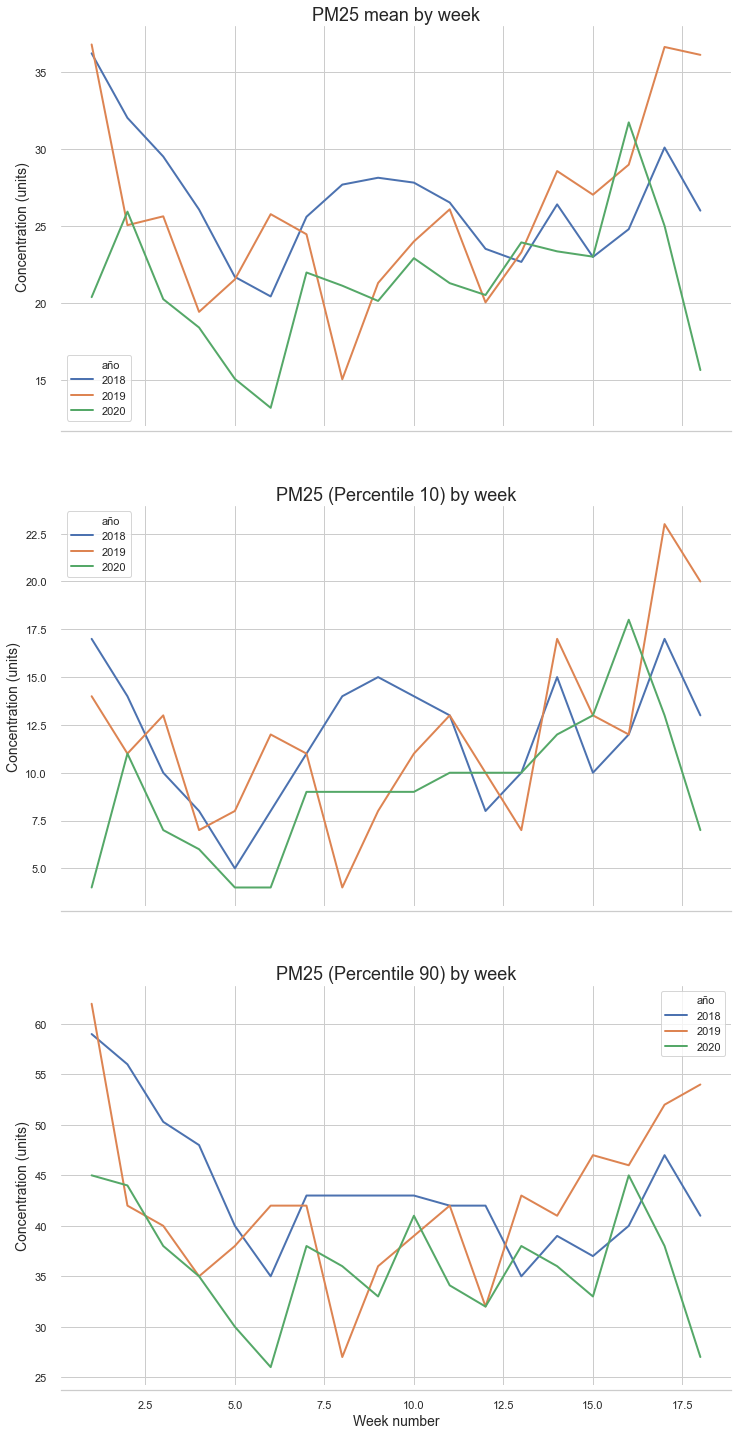

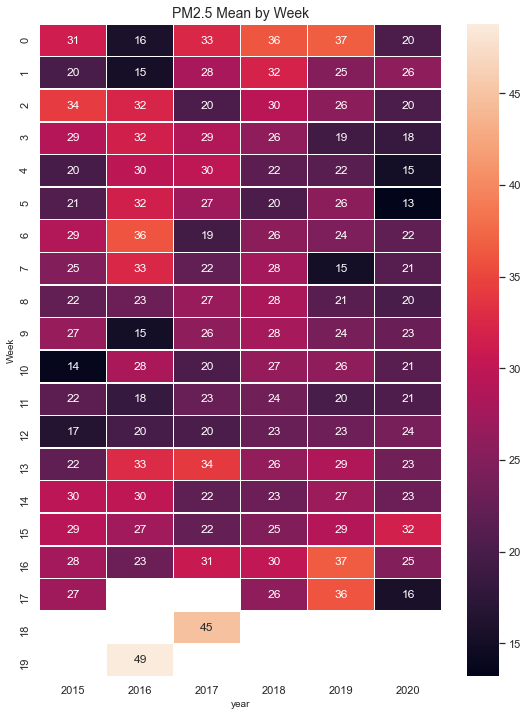

In [637]:
plot(contaminante='PM25', df=df_pm25)

## Ozono

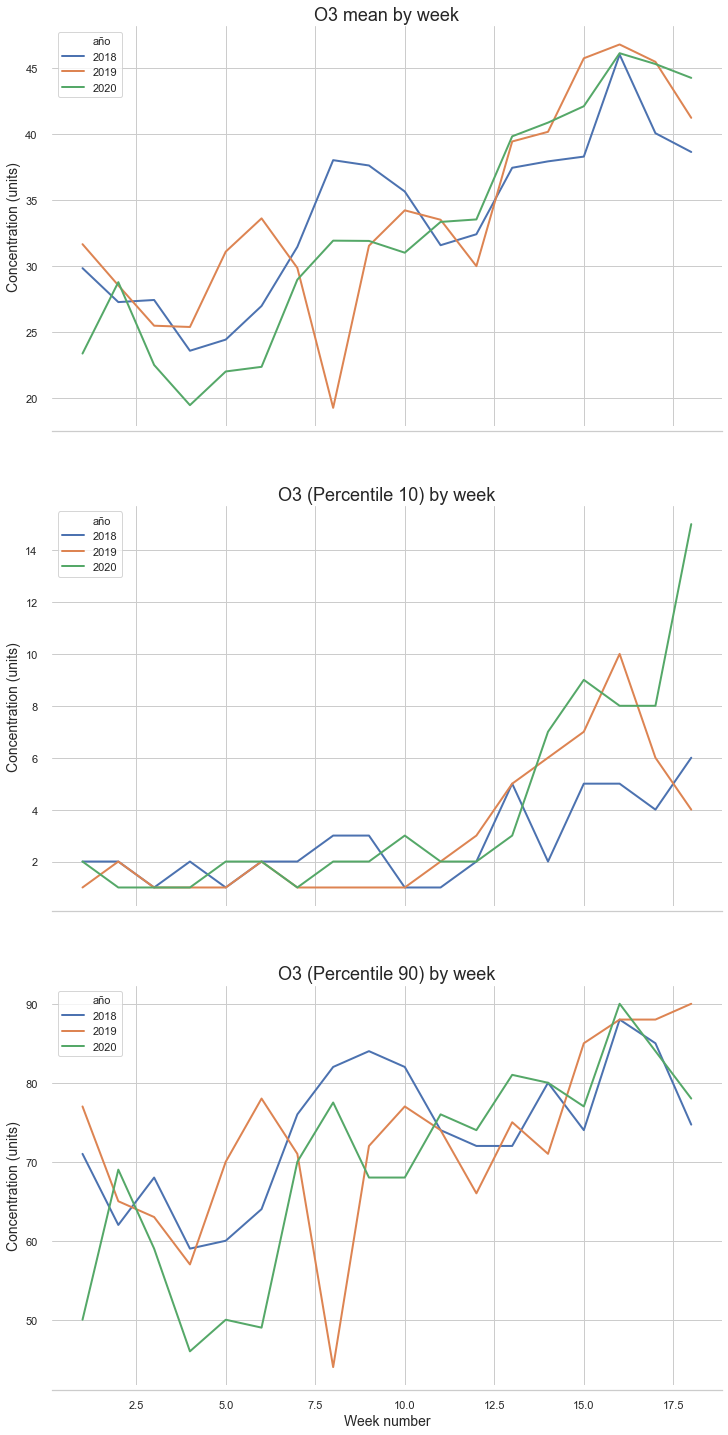

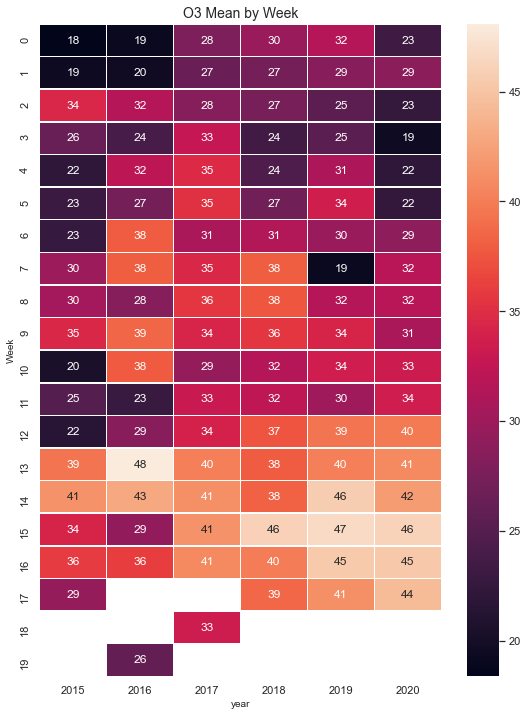

In [639]:
plot(contaminante='O3', df=df_O3)

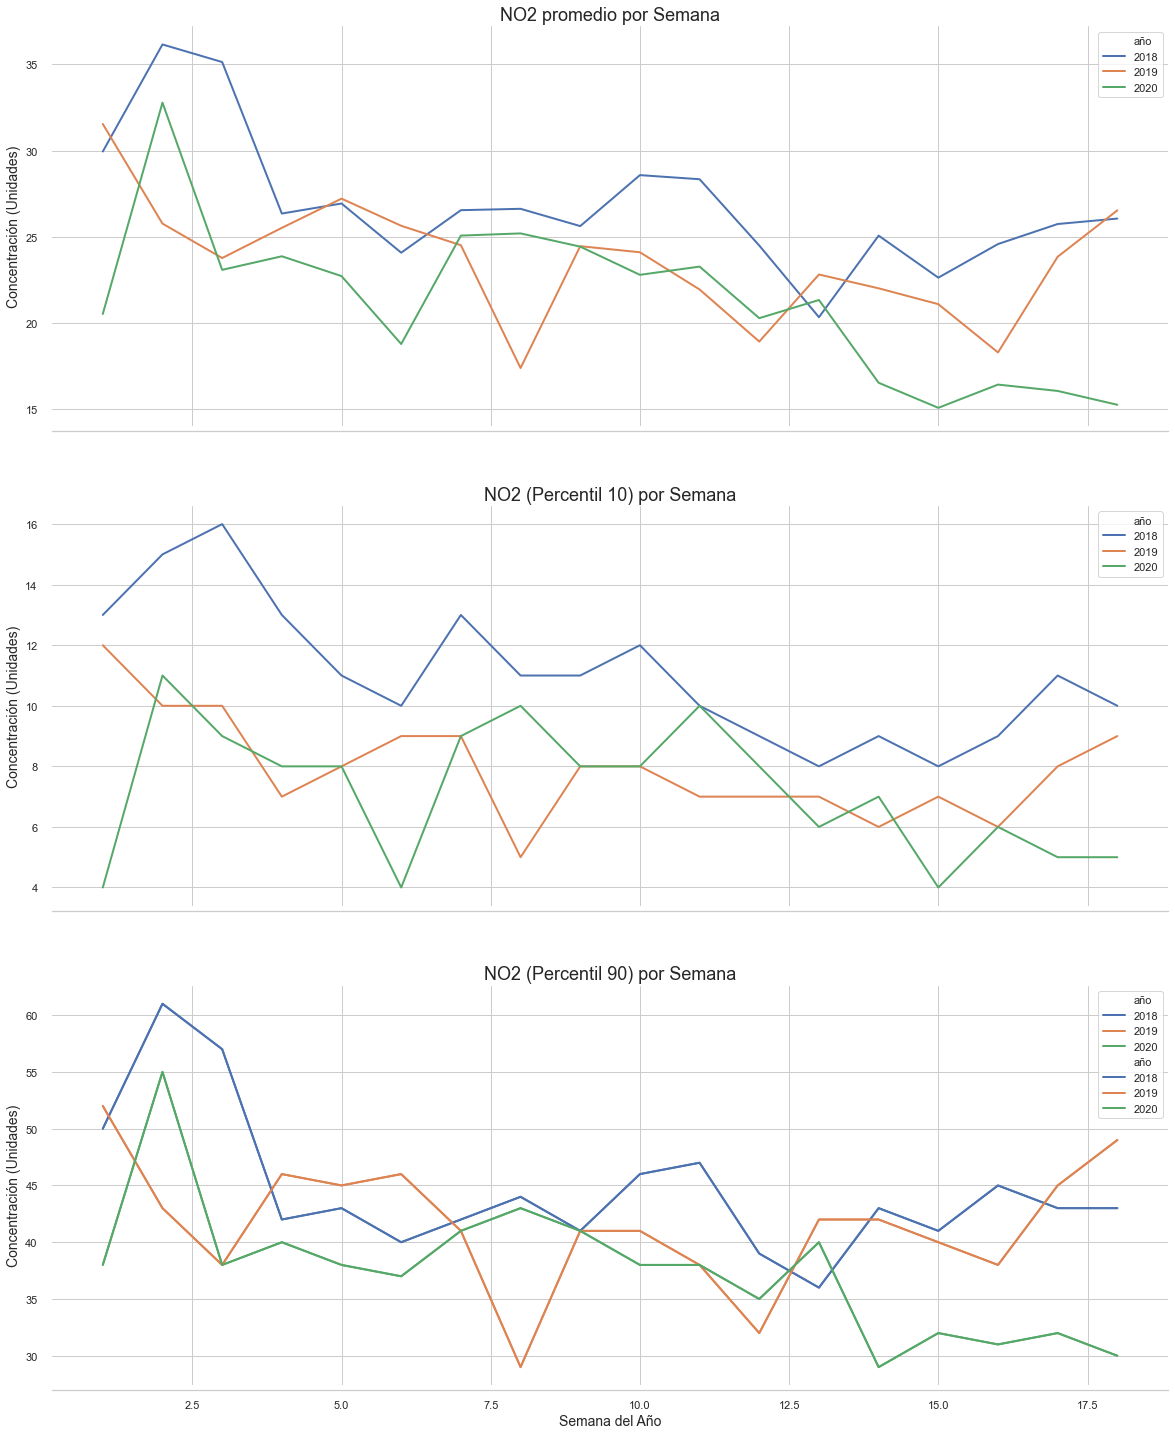

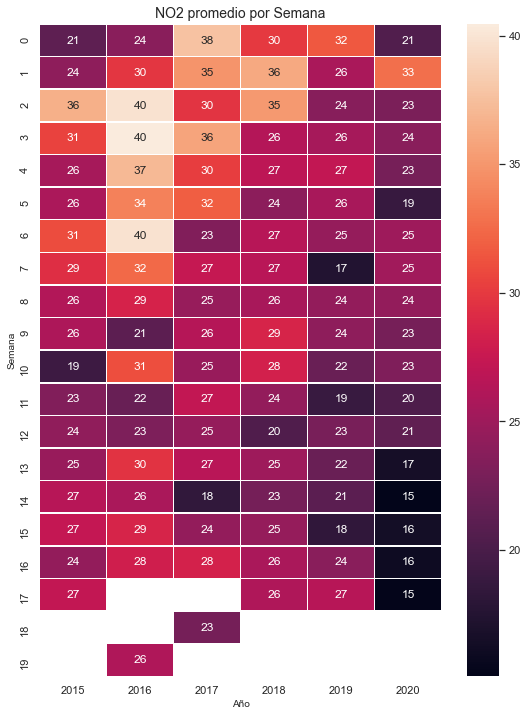

In [611]:
plot(contaminante='NO2', df=df_NO2)